# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [2]:
# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv")[['web-scraper-order',
                                                 'address_raw',
                                                 'bfs_number',
                                                 'bfs_name',
                                                 'rooms', 
                                                 'area', 
                                                 'luxurious', 
                                                 'price', 
                                                 'price_per_m2',
                                                 'pop_dens',
                                                 'frg_pct']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,web-scraper-order,address_raw,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
0,1662023695-433,"Sunnenbergstrasse 15, 8633 Wolfhausen, ZH",112,Bubikon,3.5,122,1,3180,26.07,632.558140,11.410675
1,1662023720-634,"Blumenbergstrasse 7, 8633 Wolfhausen, ZH",112,Bubikon,4.0,87,0,1690,19.43,632.558140,11.410675
2,1662023745-834,"8608 Bubikon, ZH",112,Bubikon,3.5,92,0,2350,25.54,632.558140,11.410675
3,1662023701-503,"8608 Bubikon, ZH",112,Bubikon,3.5,130,0,2500,19.23,632.558140,11.410675
4,1662023745-820,"Lavaterstr. 63, 8002 Zürich, ZH",261,Zürich,2.5,78,0,3760,48.21,4778.994655,32.458468


### Filter apartments

In [3]:
# Replace the 5000 below by the 10% quantile or 90% quantile to filter apartments
df = df_orig.loc[df_orig['pop_dens'] >= 4778.99]

### Shape (number of rows and colums)

In [4]:
# Number of rows and columns
print(df.shape)

(210, 11)


### Data types

In [5]:
df.dtypes

web-scraper-order     object
address_raw           object
bfs_number             int64
bfs_name              object
rooms                float64
area                   int64
luxurious              int64
price                  int64
price_per_m2         float64
pop_dens             float64
frg_pct              float64
dtype: object

### Summary statistics of numeric variables

In [6]:
df.describe()

,bfs_number,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
count,210.0,210.000000,210.000000,210.000000,210.000000,210.000000,2.100000e+02,210.000000
mean,261.0,2.916667,78.209524,0.076190,2958.338095,41.839000,4.778995e+03,32.458468
std,0.0,1.110609,37.798179,0.265937,1313.379350,16.952973,9.116679e-13,0.000000
min,261.0,1.000000,15.000000,0.000000,16.000000,0.120000,4.778995e+03,32.458468
25%,261.0,2.500000,56.000000,0.000000,2092.500000,30.815000,4.778995e+03,32.458468
50%,261.0,2.500000,72.000000,0.000000,2773.500000,38.060000,4.778995e+03,32.458468
75%,261.0,3.500000,96.000000,0.000000,3587.500000,49.460000,4.778995e+03,32.458468
max,261.0,6.000000,282.000000,1.000000,8900.000000,126.330000,4.778995e+03,32.458468


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [7]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.area.count(), 1),
      'Min:', round(df.area.min(), 1),
      'Max:', round(df.area.max(), 1),
      'Mean:', round(df.area.mean(), 1),
      'Median:', round(df.area.median(), 1),
      'Std:', round(df.area.std(), 1))

Price: Count: 210 Min: 16 Max: 8900 Mean: 2958.3 Median: 2773.5 Std: 1313.4
Area: Count: 210 Min: 15 Max: 282 Mean: 78.2 Median: 72.0 Std: 37.8


### Quantiles

In [8]:
df.quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,bfs_number,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
0.05,261.0,1.0,28.45,0.0,1421.20,23.57,4778.99,32.46
0.10,261.0,1.5,36.80,0.0,1588.00,25.76,4778.99,32.46
0.25,261.0,2.5,56.00,0.0,2092.50,30.82,4778.99,32.46
0.50,261.0,2.5,72.00,0.0,2773.50,38.06,4778.99,32.46
0.75,261.0,3.5,96.00,0.0,3587.50,49.46,4778.99,32.46
0.90,261.0,4.5,121.40,0.0,4541.00,64.78,4778.99,32.46
0.95,261.0,4.5,136.10,1.0,5232.45,71.43,4778.99,32.46


### Skewness

In [9]:
df.skew()

bfs_number      0.000000
rooms           0.095897
area            1.640676
luxurious       3.217945
price           1.285338
price_per_m2    1.329708
pop_dens        0.000000
frg_pct         0.000000
dtype: float64

### Kurtosis

In [10]:
df.kurtosis()

bfs_number      0.000000
rooms          -0.615760
area            5.175912
luxurious       8.435419
price           2.963418
price_per_m2    3.672615
pop_dens        0.000000
frg_pct         0.000000
dtype: float64

### Extreme values

In [11]:
# Low costs apartments
df[df.price <= 1000].head()

,web-scraper-order,address_raw,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
48,1662023723-666,"8001 Zürich, ZH",261,Zürich,4.5,137,0,16,0.12,4778.994655,32.458468
159,1662023723-667,"8001 Zürich, ZH",261,Zürich,4.5,167,0,24,0.14,4778.994655,32.458468
198,1662023798-1237,"Im Holzerhurd 60, 8046 Zürich, ZH",261,Zürich,1.0,38,0,900,23.68,4778.994655,32.458468


In [12]:
# Very expansive apartments
df[df.price >= 6000].head()

,web-scraper-order,address_raw,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
5,1662023739-771,"Parkring 59, 8002 Zürich, ZH",261,Zürich,5.5,195,1,6900,35.38,4778.994655,32.458468
18,1662023786-1149,"Freudenbergstrasse 94, 8044 Zürich, ZH",261,Zürich,4.5,128,0,6630,51.80,4778.994655,32.458468
36,1662023733-742,"Giessereistrasse 12, 8005 Zürich, ZH",261,Zürich,2.5,282,0,7500,26.60,4778.994655,32.458468
76,1662023771-1030,"Parkring 57, 8002 Zürich, ZH",261,Zürich,5.0,187,1,8900,47.59,4778.994655,32.458468
101,1662023752-871,"Kreuzstrasse 64, 8008 Zürich, ZH",261,Zürich,3.5,125,0,6390,51.12,4778.994655,32.458468


### Get a list of categories of categorical variable

In [13]:
np.array(pd.Categorical(df['bfs_name']).categories)

array(['Zürich'], dtype=object)

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [14]:
pd.crosstab(df['luxurious'], df['rooms'])

rooms,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0
luxurious,,,,,,,,,,,
0,13,24,7,54,14,42,11,26,2,0,1
1,3,1,1,3,0,4,0,1,1,2,0


### Pivot tables

In [15]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area']],
               index=['rooms'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=np.mean)

,area,price,price_per_m2
rooms,,,
1.0,43.312500,1778.750000,50.802500
1.5,53.800000,2080.560000,54.188800
2.0,52.250000,1672.250000,31.658750
2.5,70.298246,2933.842105,43.717368
3.0,67.214286,2472.785714,36.872857
3.5,86.891304,3438.021739,40.257174
4.0,91.636364,3107.000000,34.448182
4.5,112.000000,3732.037037,34.393704
5.0,149.333333,5706.666667,37.743333


### Correlation matrix

In [16]:
corr = df.corr()
corr

,bfs_number,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
bfs_number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,NaN,1.000000,0.617325,0.029700,0.521378,-0.324037,NaN,NaN
area,NaN,0.617325,1.000000,0.275435,0.603648,-0.492173,NaN,NaN
luxurious,NaN,0.029700,0.275435,1.000000,0.285945,-0.057664,NaN,NaN
price,NaN,0.521378,0.603648,0.285945,1.000000,0.217100,NaN,NaN
price_per_m2,NaN,-0.324037,-0.492173,-0.057664,0.217100,1.000000,NaN,NaN
pop_dens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frg_pct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Covariance matrix

In [17]:
cov = df.cov()
cov

,bfs_number,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
bfs_number,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
rooms,0.0,1.233453e+00,2.591467e+01,8.771930e-03,7.605092e+02,-6.101017e+00,-2.183748e-28,0.0
area,0.0,2.591467e+01,1.428702e+03,2.768649e+00,2.996709e+04,-3.153805e+02,9.399780e-27,0.0
luxurious,0.0,8.771930e-03,2.768649e+00,7.072226e-02,9.987364e+01,-2.599713e-01,-1.739268e-29,0.0
price,0.0,7.605092e+02,2.996709e+04,9.987364e+01,1.724965e+06,4.833891e+03,1.246708e-25,0.0
price_per_m2,0.0,-6.101017e+00,-3.153805e+02,-2.599713e-01,4.833891e+03,2.874033e+02,-7.668241e-27,0.0
pop_dens,0.0,-2.183748e-28,9.399780e-27,-1.739268e-29,1.246708e-25,-7.668241e-27,8.311384e-25,0.0
frg_pct,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

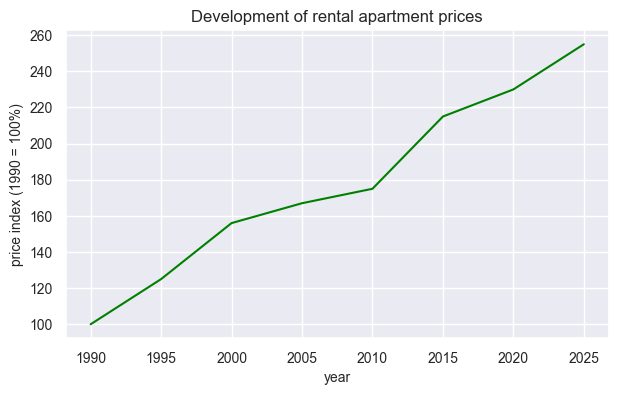

In [18]:
# Generate some useful values (time series)
x = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
y = [100, 125, 156, 167, 175, 215, 230, 255]

# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of rental apartment prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<AxesSubplot: xlabel='price'>

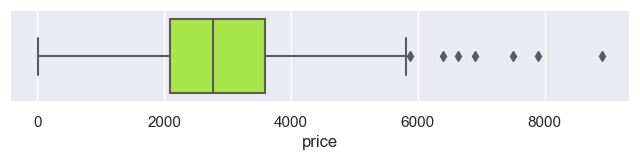

In [19]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['price'], color="greenyellow")

### Histogram  (matplotlib)

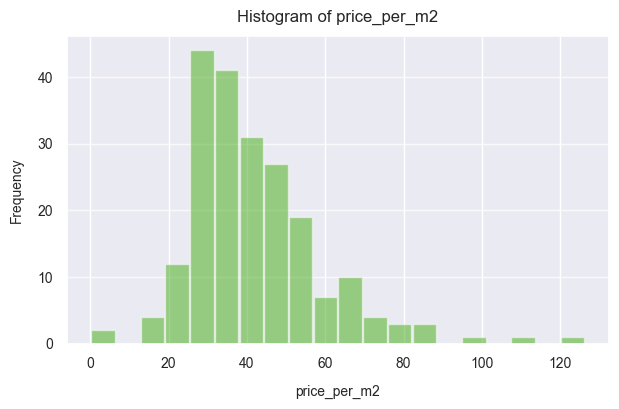

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=20, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

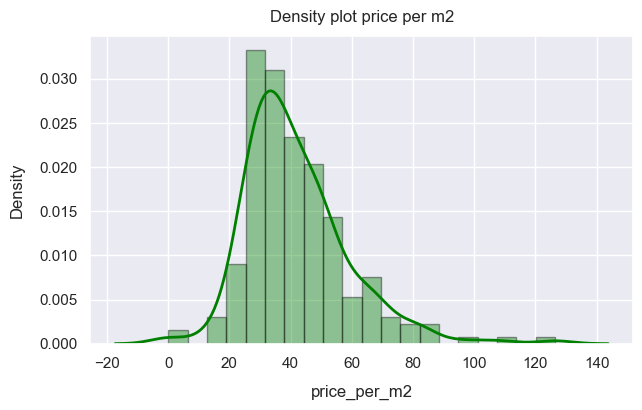

In [21]:
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_m2'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per m2', fontsize=12, pad=10)
plt.xlabel('price_per_m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

     area       var
10     15 -1.672290
106    20 -1.540009
166    22 -1.487096
107    22 -1.487096
197    22 -1.487096
..    ...       ...
76    187  2.878194
5     195  3.089844
21    195  3.089844
87    231  4.042271
36    282  5.391542

[210 rows x 2 columns]


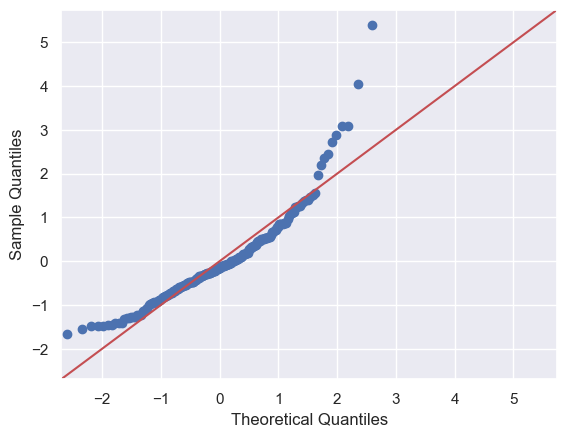

In [22]:
# Variable (standardized)
x = 'area'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['area', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Barchart  (matplotlib)

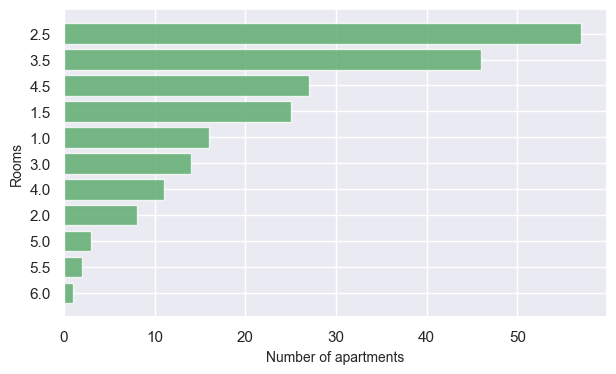

In [23]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, labels=index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

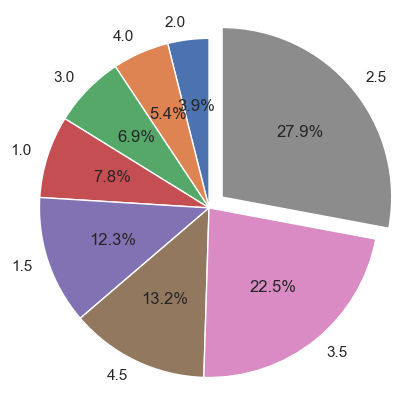

In [24]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.rooms.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

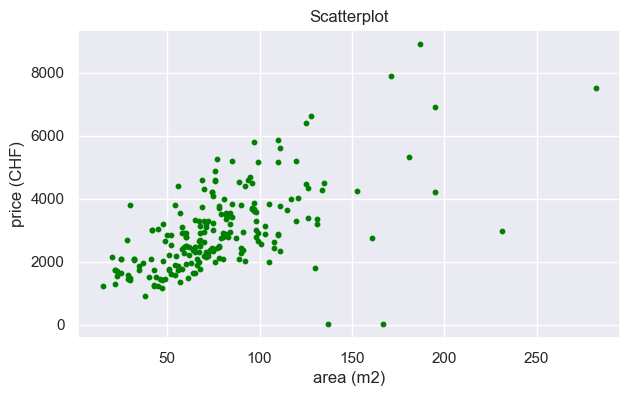

In [25]:
plt.figure(figsize=(7,4))
plt.scatter(df['area'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(207, 12)
23.173370018505544
1196.3133495767818


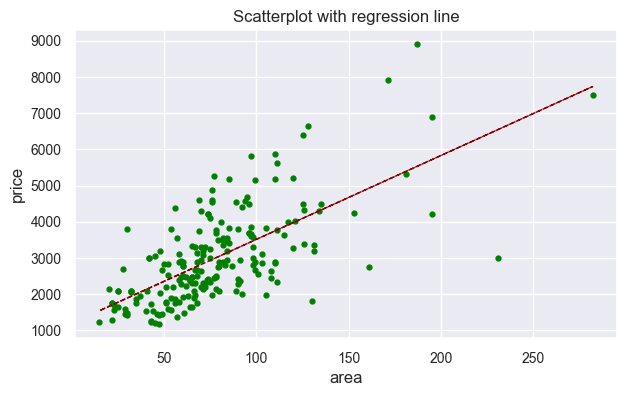

In [26]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.area, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.area, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.area, 
         b*df_sub.area + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

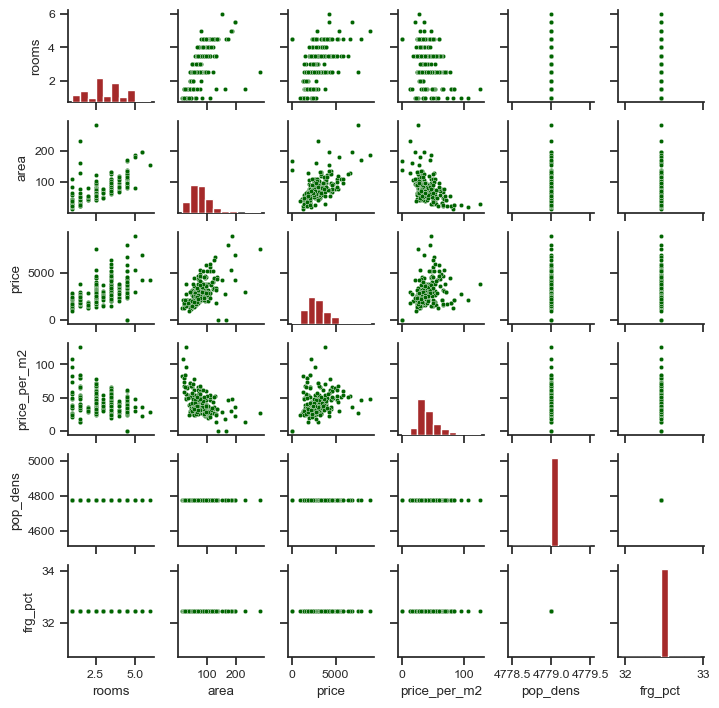

In [27]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(203, 12)


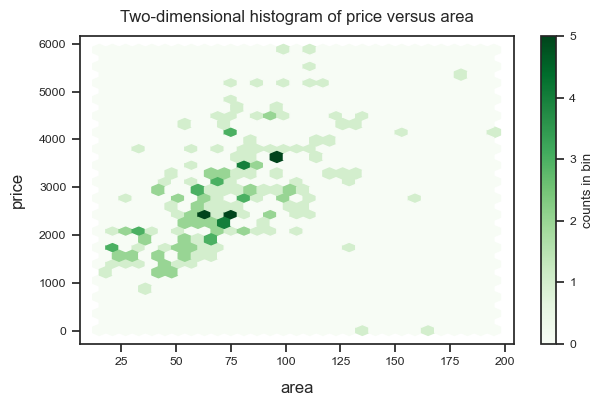

In [28]:
# Subset
df_sub = df.loc[(df.price <= 6000) & (df.area <= 200)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.area, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('area', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

<AxesSubplot: >

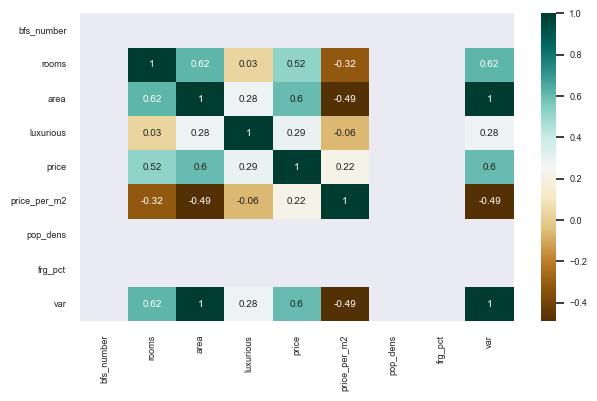

In [29]:
# Set font size for plot
sns.set(font_scale=0.6)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df.corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

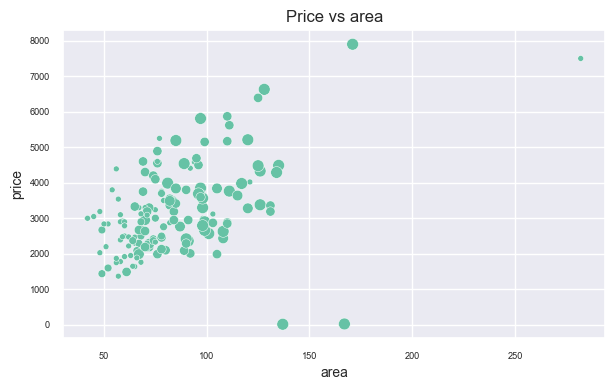

In [30]:
# Subset of df
df_sub = df.loc[(df['rooms'] >= 2.5) & (df['rooms'] <= 4.5)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="area", 
                     y="price",
                     size="rooms", # determines bubble size
                     hue="pop_dens",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [31]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2022-10-11 10:30:28
Python Version: 3.9.13
-----------------------------------
